In [70]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn

import numpy as np
from sklearn.model_selection import train_test_split

from ModelHelper2 import *
from ModelHelper2 import myNeural

from Dataset import DatasetRandom

from hyperopt import hp
from hyperopt import fmin, tpe, hp

from ray import tune

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Data

In [49]:
trainData = DatasetRandom(size = 10000)

testData = DatasetRandom(size = 2000)

# Hyper-Parameter Tunning

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Single Model Trial

In [51]:
defaultConfig = {
    'input_shape':(20,20),
    'hidden_size': 300,
    'act_func_1': nn.ReLU,
    'act_func_2': nn.ReLU,
    
    'lossFunction': nn.BCEWithLogitsLoss, 
    'optimiser': torch.optim.SGD, 'lr': 0.1,
    'epoch': 2, 'batch_size': 128,
}

In [52]:
singleModel = myNeural(defaultConfig)

In [53]:
singleModel

myNeural(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (stack): Sequential(
    (0): Linear(in_features=400, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=300, bias=True)
    (3): ReLU()
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)

In [54]:
singleModel.optimise(trainData, testData, 
                     defaultConfig,
                    hideEpochProgressBar=False,
                    hideBatchProgressBar=False)

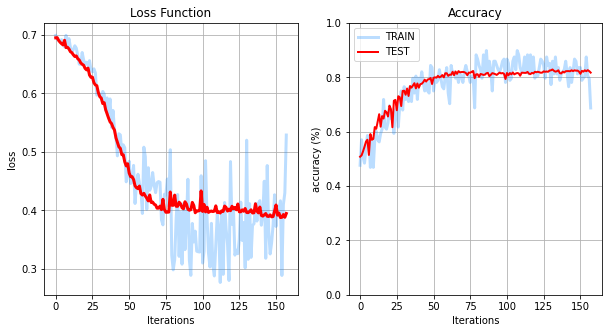

In [55]:
singleModel.plotTraining()

# Hyper-Parameter Tuning

In [71]:
paramSpace = space = {
    # model parameters
    'input_shape': hp.choice('input_shape', [(20,20)]),
    'hidden_size': hp.randint('hidden_size', 400, 512),
    'act_func_1': hp.choice('act_func_1', [nn.ReLU, nn.LeakyReLU, nn.Sigmoid, nn.Tanh]),
    'act_func_2': hp.choice('act_func_2', [nn.ReLU, nn.LeakyReLU, nn.Sigmoid, nn.Tanh]),
    
    # trainer parameters
    # 'optimiser': hp.choice('optimiser', [torch.optim.SGD, torch.optim.Adam, torch.optim.LBFGS]),
    'lr' : hp.uniform('lr', 0.1, 1.5),
    'epoch': 1+ hp.randint('epoch', 25),
    'batch_size': 1 + hp.randint('batch_size', 512),
}

In [72]:
myNeural.hyperTuner(trainData, testData, paramSpace)

2021-05-25 10:03:34,741	WARNING suggestion.py:88 -- DeprecationWarning: `max_concurrent` is deprecated for this search algorithm. Use tune.suggest.ConcurrencyLimiter() instead. This will raise an error in future versions of Ray.
2021-05-25 10:03:34,752	INFO registry.py:64 -- Detected unknown callable for trainable. Converting to class.


Trial name,status,loc
fitTrain_697e3_00000,RUNNING,
fitTrain_697e3_00001,PENDING,
fitTrain_697e3_00002,PENDING,
fitTrain_697e3_00003,PENDING,
fitTrain_697e3_00004,PENDING,
fitTrain_697e3_00005,PENDING,
fitTrain_697e3_00006,PENDING,
fitTrain_697e3_00007,PENDING,
fitTrain_697e3_00008,PENDING,
fitTrain_697e3_00009,PENDING,


Trial name,status,loc
fitTrain_697e3_00000,RUNNING,
fitTrain_697e3_00001,RUNNING,
fitTrain_697e3_00002,RUNNING,
fitTrain_697e3_00003,RUNNING,
fitTrain_697e3_00004,RUNNING,
fitTrain_697e3_00005,RUNNING,
fitTrain_697e3_00006,RUNNING,
fitTrain_697e3_00007,RUNNING,
fitTrain_697e3_00008,RUNNING,
fitTrain_697e3_00009,RUNNING,


(pid=54205) 2021-05-25 10:03:49,809	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=54205) Traceback (most recent call last):
(pid=54205)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54205)     self._entrypoint()
(pid=54205)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54205)     return self._trainable_func(self.config, self._status_reporter,
(pid=54205)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54205)     output = fn()
(pid=54205)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54205)     model = cls(config)
(pid=54205)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 72, in __

Result for fitTrain_697e3_00004:
  {}
  


Trial name,status,loc
fitTrain_697e3_00000,RUNNING,
fitTrain_697e3_00001,RUNNING,
fitTrain_697e3_00002,RUNNING,
fitTrain_697e3_00003,RUNNING,
fitTrain_697e3_00005,RUNNING,
fitTrain_697e3_00006,RUNNING,
fitTrain_697e3_00007,RUNNING,
fitTrain_697e3_00008,RUNNING,
fitTrain_697e3_00009,RUNNING,
fitTrain_697e3_00010,RUNNING,


(pid=54205) Traceback (most recent call last):
(pid=54205)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54205)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54205)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54205)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54205)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54205)     return method(__ray_actor, *args, **kwargs)
(pid=54205)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54205)     result = self.train()
(pid=54205)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54205)     result = self.step()
(pid=54205)   File "/Users/shaominliu/opt/anaconda3/lib/python3

(pid=54202) Exception ignored in: 'ray._raylet.task_execution_handler'
(pid=54202) Traceback (most recent call last):
(pid=54202)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/utils.py", line 102, in push_error_to_driver
(pid=54202)     worker.core_worker.push_error(job_id, error_type, message, time.time())
(pid=54202)   File "python/ray/_raylet.pyx", line 1682, in ray._raylet.CoreWorker.push_error
(pid=54202) UnicodeEncodeError: 'ascii' codec can't encode characters in position 1738-1743: ordinal not in range(128)
(pid=54211) Traceback (most recent call last):
(pid=54211)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54211)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54211)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54211)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54211)   File "/Users/shaominliu/opt/anaco

Result for fitTrain_697e3_00002:
  {}
  



(pid=54210)     self._report_thread_runner_error(block=True)
(pid=54210)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 512, in _report_thread_runner_error
(pid=54210)     raise TuneError(
(pid=54210) ray.tune.error.TuneError: Trial raised an exception. Traceback:
(pid=54210) Traceback (most recent call last):
(pid=54210)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54210)     self._entrypoint()
(pid=54210)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54210)     return self._trainable_func(self.config, self._status_reporter,
(pid=54210)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54210)     output = fn()
(pid=54210)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/

2021-05-25 10:03:50,348	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00007: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54202, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00008:
  {}
  
Result for fitTrain_697e3_00007:
  {}
  


2021-05-25 10:03:50,453	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00003: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54205, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00003:
  {}
  


2021-05-25 10:03:50,538	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00009: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54206, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00009:
  {}
  


2021-05-25 10:03:50,704	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00001: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54230, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00001:
  {}
  


2021-05-25 10:03:50,877	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00005: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54211, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00005:
  {}
  


2021-05-25 10:03:50,975	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00006: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54207, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00006:
  {}
  
Result for fitTrain_697e3_00000:
  {}
  


(pid=54263) 2021-05-25 10:03:55,767	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=54263) Traceback (most recent call last):
(pid=54263)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54263)     self._entrypoint()
(pid=54263)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54263)     return self._trainable_func(self.config, self._status_reporter,
(pid=54263)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54263)     output = fn()
(pid=54263)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54263)     model = cls(config)
(pid=54263)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 72, in __

Result for fitTrain_697e3_00011:
  {}
  


Trial name,status,loc
fitTrain_697e3_00010,RUNNING,
fitTrain_697e3_00012,RUNNING,
fitTrain_697e3_00013,RUNNING,
fitTrain_697e3_00014,RUNNING,
fitTrain_697e3_00015,RUNNING,
fitTrain_697e3_00016,RUNNING,
fitTrain_697e3_00017,RUNNING,
fitTrain_697e3_00022,PENDING,
fitTrain_697e3_00023,PENDING,
fitTrain_697e3_00024,PENDING,


(pid=54263) Traceback (most recent call last):
(pid=54263)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54263)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54263)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54263)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54263)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54263)     return method(__ray_actor, *args, **kwargs)
(pid=54263)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54263)     result = self.train()
(pid=54263)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54263)     result = self.step()
(pid=54263)   File "/Users/shaominliu/opt/anaconda3/lib/python3

Result for fitTrain_697e3_00010:
  {}
  


(pid=54262)     raise TuneError(
(pid=54262) ray.tune.error.TuneError: Trial raised an exception. Traceback:
(pid=54262) Traceback (most recent call last):
(pid=54262)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54262)     self._entrypoint()
(pid=54262)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54262)     return self._trainable_func(self.config, self._status_reporter,
(pid=54262)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54262)     output = fn()
(pid=54262)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54262)     model = cls(config)
(pid=54262)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", l

Result for fitTrain_697e3_00020:
  {}
  


(pid=54271) Traceback (most recent call last):
(pid=54271)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54271)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54271)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54269) Traceback (most recent call last):
(pid=54269)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54269)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54269)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54269)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54269)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54269)     return method(__ray_actor, *args, **kwargs)
(pid=54269)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainabl

Trial name,status,loc
fitTrain_697e3_00012,RUNNING,
fitTrain_697e3_00013,RUNNING,
fitTrain_697e3_00014,RUNNING,
fitTrain_697e3_00015,RUNNING,
fitTrain_697e3_00016,RUNNING,
fitTrain_697e3_00017,RUNNING,
fitTrain_697e3_00018,RUNNING,
fitTrain_697e3_00024,PENDING,
fitTrain_697e3_00025,PENDING,
fitTrain_697e3_00026,PENDING,



(pid=54272)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54272)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54272)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54272)     return method(__ray_actor, *args, **kwargs)
(pid=54272)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54272)     result = self.train()
(pid=54272)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54272)     result = self.step()
(pid=54272)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 366, in step
(pid=54272)     self._report_thread_runner_error(block=True)
(pid=54272)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tu

Result for fitTrain_697e3_00019:
  {}
  


(pid=54275) Traceback (most recent call last):
(pid=54275)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54275)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54275)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54275)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54275)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54275)     return method(__ray_actor, *args, **kwargs)
(pid=54275)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54275)     result = self.train()
(pid=54275)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54275)     result = self.step()
(pid=54275)   File "/Users/shaominliu/opt/anaconda3/lib/python3

(pid=54277)     raise TuneError(
(pid=54277) ray.tune.error.TuneError: Trial raised an exception. Traceback:
(pid=54277) Traceback (most recent call last):
(pid=54277)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54277)     self._entrypoint()
(pid=54277)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54277)     return self._trainable_func(self.config, self._status_reporter,
(pid=54277)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54277)     output = fn()
(pid=54277)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54277)     model = cls(config)
(pid=54277)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", l

Result for fitTrain_697e3_00018:
  {}
  


(pid=54274)   File "python/ray/_raylet.pyx", line 1682, in ray._raylet.CoreWorker.push_error
(pid=54274) UnicodeEncodeError: 'ascii' codec can't encode characters in position 1738-1743: ordinal not in range(128)
(pid=54274) Exception ignored in: 'ray._raylet.task_execution_handler'
(pid=54274) Traceback (most recent call last):
(pid=54274)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/utils.py", line 102, in push_error_to_driver
(pid=54274)     worker.core_worker.push_error(job_id, error_type, message, time.time())
(pid=54274)   File "python/ray/_raylet.pyx", line 1682, in ray._raylet.CoreWorker.push_error
(pid=54274) UnicodeEncodeError: 'ascii' codec can't encode characters in position 1738-1743: ordinal not in range(128)
(pid=54279) Traceback (most recent call last):
(pid=54279)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54279)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54279)   File 

(pid=54276) Traceback (most recent call last):
(pid=54276)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54276)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54276)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54276)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54276)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54276)     return method(__ray_actor, *args, **kwargs)
(pid=54276)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54276)     result = self.train()
(pid=54276)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54276)     result = self.step()
(pid=54276)   File "/Users/shaominliu/opt/anaconda3/lib/python3

Result for fitTrain_697e3_00015:
  {}
  


2021-05-25 10:04:12,180	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00016: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54279, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00016:
  {}
  


2021-05-25 10:04:12,344	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00017: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54274, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00017:
  {}
  


2021-05-25 10:04:12,421	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00022: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54271, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00022:
  {}
  
Result for fitTrain_697e3_00012:

2021-05-25 10:04:12,818	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00013: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54276, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra


  {}
  
Result for fitTrain_697e3_00013:
  {}
  


2021-05-25 10:04:12,981	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00014: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54277, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00014:
  {}
  
Result for fitTrain_697e3_00021:
  {}
  
Result for fitTrain_697e3_00023:
  {}
  


(pid=54319) 2021-05-25 10:04:29,427	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=54319) Traceback (most recent call last):
(pid=54319)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54319)     self._entrypoint()
(pid=54319)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54319)     return self._trainable_func(self.config, self._status_reporter,
(pid=54319)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54319)     output = fn()
(pid=54319)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54319)     model = cls(config)
(pid=54319)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 72, in __

Result for fitTrain_697e3_00033:
  {}
  


(pid=54319) Traceback (most recent call last):
(pid=54319)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54319)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54319)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54319)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54319)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54319)     return method(__ray_actor, *args, **kwargs)
(pid=54319)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54319)     result = self.train()
(pid=54319)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54319)     result = self.step()
(pid=54319)   File "/Users/shaominliu/opt/anaconda3/lib/python3

Trial name,status,loc
fitTrain_697e3_00024,RUNNING,
fitTrain_697e3_00025,RUNNING,
fitTrain_697e3_00026,RUNNING,
fitTrain_697e3_00027,RUNNING,
fitTrain_697e3_00028,RUNNING,
fitTrain_697e3_00029,RUNNING,
fitTrain_697e3_00030,RUNNING,
fitTrain_697e3_00036,PENDING,
fitTrain_697e3_00037,PENDING,
fitTrain_697e3_00038,PENDING,



(pid=54324)     raise e
(pid=54324)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54324)     self._entrypoint()
(pid=54324)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54324)     return self._trainable_func(self.config, self._status_reporter,
(pid=54324)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54324)     output = fn()
(pid=54324)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54324)     model = cls(config)
(pid=54324)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 72, in __init__
(pid=54324)     input_size = reduce(mul, self.config['input_shape'])
(pid=54324) KeyError: 'input_shape'
(pid=5

(pid=54320) Traceback (most recent call last):
(pid=54320)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54320)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54320)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54320)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54320)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54320)     return method(__ray_actor, *args, **kwargs)
(pid=54320)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54320)     result = self.train()
(pid=54320)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54320)     result = self.step()
(pid=54320)   File "/Users/shaominliu/opt/anaconda3/lib/python3

Result for fitTrain_697e3_00035:
  {}
  
Result for fitTrain_697e3_00034:
  {}
  


(pid=54322) Traceback (most recent call last):
(pid=54322)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54322)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54322)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54322)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54322)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54322)     return method(__ray_actor, *args, **kwargs)
(pid=54322)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54322)     result = self.train()
(pid=54322)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54322)     result = self.step()
(pid=54322)   File "/Users/shaominliu/opt/anaconda3/lib/python3

(pid=54327)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 366, in step
(pid=54327)     self._report_thread_runner_error(block=True)
(pid=54327)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 512, in _report_thread_runner_error
(pid=54327)     raise TuneError(
(pid=54327) ray.tune.error.TuneError: Trial raised an exception. Traceback:
(pid=54327) Traceback (most recent call last):
(pid=54327)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54327)     self._entrypoint()
(pid=54327)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54327)     return self._trainable_func(self.config, self._status_reporter,
(pid=54327)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trai

Result for fitTrain_697e3_00030:
  {}
  


2021-05-25 10:04:30,041	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00031: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54324, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00031:
  {}
  
Result for fitTrain_697e3_00032:
  {}
  


(pid=54326) Traceback (most recent call last):
(pid=54326)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54326)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54326)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54326)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54326)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54326)     return method(__ray_actor, *args, **kwargs)
(pid=54326)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54326)     result = self.train()
(pid=54326)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54326)     result = self.step()
(pid=54326)   File "/Users/shaominliu/opt/anaconda3/lib/python3

Result for fitTrain_697e3_00028:
  {}
  


2021-05-25 10:04:30,353	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00027: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54329, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00027:
  {}
  


2021-05-25 10:04:30,509	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00026: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54328, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00026:
  {}
  


2021-05-25 10:04:30,630	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00024: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54332, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00024:
  {}
  


2021-05-25 10:04:30,795	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00029: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54326, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00029:
  {}
  


2021-05-25 10:04:30,940	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00025: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54333, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00025:
  {}
  


(pid=54379) 2021-05-25 10:04:43,143	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=54379) Traceback (most recent call last):
(pid=54379)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54379)     self._entrypoint()
(pid=54379)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54379)     return self._trainable_func(self.config, self._status_reporter,
(pid=54379)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54379)     output = fn()
(pid=54379)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54379)     model = cls(config)
(pid=54379)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 72, in __

Result for fitTrain_697e3_00047:
  {}
  


(pid=54382) 2021-05-25 10:04:43,401	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=54382) Traceback (most recent call last):
(pid=54382)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54382)     self._entrypoint()
(pid=54382)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54382)     return self._trainable_func(self.config, self._status_reporter,
(pid=54382)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54382)     output = fn()
(pid=54382)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54382)     model = cls(config)
(pid=54382)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 72, in __

Trial name,status,loc
fitTrain_697e3_00036,RUNNING,
fitTrain_697e3_00037,RUNNING,
fitTrain_697e3_00038,RUNNING,
fitTrain_697e3_00039,RUNNING,
fitTrain_697e3_00040,RUNNING,
fitTrain_697e3_00041,RUNNING,
fitTrain_697e3_00042,RUNNING,
fitTrain_697e3_00043,RUNNING,
fitTrain_697e3_00044,RUNNING,
fitTrain_697e3_00048,PENDING,


(pid=54389) 2021-05-25 10:04:43,427	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=54389) Traceback (most recent call last):
(pid=54389)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54389)     self._entrypoint()
(pid=54389)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54389)     return self._trainable_func(self.config, self._status_reporter,
(pid=54389)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54389)     output = fn()
(pid=54389)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54389)     model = cls(config)
(pid=54389)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 72, in __

Result for fitTrain_697e3_00046:
  {}
  


(pid=54380) Traceback (most recent call last):
(pid=54380)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54380)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54380)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54380)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54380)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54380)     return method(__ray_actor, *args, **kwargs)
(pid=54380)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54380)     result = self.train()
(pid=54380)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54380)     result = self.step()
(pid=54380)   File "/Users/shaominliu/opt/anaconda3/lib/python3

(pid=54377) Traceback (most recent call last):
(pid=54377)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54377)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54377)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54377)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54377)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54377)     return method(__ray_actor, *args, **kwargs)
(pid=54377)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54377)     result = self.train()
(pid=54377)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54377)     result = self.step()
(pid=54377)   File "/Users/shaominliu/opt/anaconda3/lib/python3

(pid=54382) During handling of the above exception, another exception occurred:
(pid=54382) 
(pid=54382) Traceback (most recent call last):
(pid=54382)   File "python/ray/_raylet.pyx", line 599, in ray._raylet.task_execution_handler
(pid=54382)   File "python/ray/_raylet.pyx", line 451, in ray._raylet.execute_task
(pid=54382)   File "python/ray/_raylet.pyx", line 556, in ray._raylet.execute_task
(pid=54382)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/utils.py", line 102, in push_error_to_driver
(pid=54382)     worker.core_worker.push_error(job_id, error_type, message, time.time())
(pid=54382)   File "python/ray/_raylet.pyx", line 1682, in ray._raylet.CoreWorker.push_error
(pid=54382) UnicodeEncodeError: 'ascii' codec can't encode characters in position 1676-1681: ordinal not in range(128)
(pid=54382) 
(pid=54382) During handling of the above exception, another exception occurred:
(pid=54382) 
(pid=54382) Traceback (most recent call last):
(pid=54382

Result for fitTrain_697e3_00043:
  {}
  
Result for fitTrain_697e3_00038:
  {}
  



(pid=54384)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54384)     result = self.step()
(pid=54384)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 366, in step
(pid=54384)     self._report_thread_runner_error(block=True)
(pid=54384)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 512, in _report_thread_runner_error
(pid=54384)     raise TuneError(
(pid=54384) ray.tune.error.TuneError: Trial raised an exception. Traceback:
(pid=54384) Traceback (most recent call last):
(pid=54384)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54384)     self._entrypoint()
(pid=54384)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54384)     return self._trainable_func(sel

2021-05-25 10:04:43,745	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00044: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54378, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00044:
  {}
  
Result for fitTrain_697e3_00045:
  {}
  


2021-05-25 10:04:43,791	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00040: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54383, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

2021-05-25 10:04:43,893	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00036: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54392, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00040:
  {}
  
Result for fitTrain_697e3_00041:
  {}
  
Result for fitTrain_697e3_00039:
  {}
  
Result for fitTrain_697e3_00036:
  {}
  
Result for fitTrain_697e3_00037:
  {}
  
Result for fitTrain_697e3_00042:
  {}
  


(pid=54425) 2021-05-25 10:04:51,361	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=54425) Traceback (most recent call last):
(pid=54425)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=54425)     self._entrypoint()
(pid=54425)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 315, in entrypoint
(pid=54425)     return self._trainable_func(self.config, self._status_reporter,
(pid=54425)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=54425)     output = fn()
(pid=54425)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 278, in fitTrain
(pid=54425)     model = cls(config)
(pid=54425)   File "/Users/shaominliu/Documents/工作使我疯狂/2021 Holmusk Internship/Github/PyTorchExercise/ModelHelper2.py", line 72, in __

Result for fitTrain_697e3_00048:
  {}
  


Trial name,status,loc
fitTrain_697e3_00049,RUNNING,
fitTrain_697e3_00000,ERROR,
fitTrain_697e3_00001,ERROR,
fitTrain_697e3_00002,ERROR,
fitTrain_697e3_00003,ERROR,
fitTrain_697e3_00004,ERROR,
fitTrain_697e3_00005,ERROR,
fitTrain_697e3_00006,ERROR,
fitTrain_697e3_00007,ERROR,
fitTrain_697e3_00008,ERROR,


2021-05-25 10:04:51,604	ERROR trial_runner.py:732 -- Trial fitTrain_697e3_00049: Error processing event.
Traceback (most recent call last):
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trial_runner.py", line 702, in _process_trial
    results = self.trial_executor.fetch_result(trial)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/ray_trial_executor.py", line 686, in fetch_result
    result = ray.get(trial_future[0], timeout=DEFAULT_GET_TIMEOUT)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 47, in wrapper
    return func(*args, **kwargs)
  File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/worker.py", line 1481, in get
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(TuneError): ray::ImplicitFunc.train_buffered() (pid=54424, ip=192.168.1.254)
  File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
  File "python/ra

Result for fitTrain_697e3_00049:
  {}
  


(pid=54425) Traceback (most recent call last):
(pid=54425)   File "python/ray/_raylet.pyx", line 488, in ray._raylet.execute_task
(pid=54425)   File "python/ray/_raylet.pyx", line 495, in ray._raylet.execute_task
(pid=54425)   File "python/ray/_raylet.pyx", line 505, in ray._raylet.execute_task
(pid=54425)   File "python/ray/_raylet.pyx", line 449, in ray._raylet.execute_task.function_executor
(pid=54425)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/_private/function_manager.py", line 556, in actor_method_executor
(pid=54425)     return method(__ray_actor, *args, **kwargs)
(pid=54425)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 173, in train_buffered
(pid=54425)     result = self.train()
(pid=54425)   File "/Users/shaominliu/opt/anaconda3/lib/python3.8/site-packages/ray/tune/trainable.py", line 232, in train
(pid=54425)     result = self.step()
(pid=54425)   File "/Users/shaominliu/opt/anaconda3/lib/python3

Trial name,status,loc
fitTrain_697e3_00000,ERROR,
fitTrain_697e3_00001,ERROR,
fitTrain_697e3_00002,ERROR,
fitTrain_697e3_00003,ERROR,
fitTrain_697e3_00004,ERROR,
fitTrain_697e3_00005,ERROR,
fitTrain_697e3_00006,ERROR,
fitTrain_697e3_00007,ERROR,
fitTrain_697e3_00008,ERROR,
fitTrain_697e3_00009,ERROR,


TuneError: ('Trials did not complete', [fitTrain_697e3_00000, fitTrain_697e3_00001, fitTrain_697e3_00002, fitTrain_697e3_00003, fitTrain_697e3_00004, fitTrain_697e3_00005, fitTrain_697e3_00006, fitTrain_697e3_00007, fitTrain_697e3_00008, fitTrain_697e3_00009, fitTrain_697e3_00010, fitTrain_697e3_00011, fitTrain_697e3_00012, fitTrain_697e3_00013, fitTrain_697e3_00014, fitTrain_697e3_00015, fitTrain_697e3_00016, fitTrain_697e3_00017, fitTrain_697e3_00018, fitTrain_697e3_00019, fitTrain_697e3_00020, fitTrain_697e3_00021, fitTrain_697e3_00022, fitTrain_697e3_00023, fitTrain_697e3_00024, fitTrain_697e3_00025, fitTrain_697e3_00026, fitTrain_697e3_00027, fitTrain_697e3_00028, fitTrain_697e3_00029, fitTrain_697e3_00030, fitTrain_697e3_00031, fitTrain_697e3_00032, fitTrain_697e3_00033, fitTrain_697e3_00034, fitTrain_697e3_00035, fitTrain_697e3_00036, fitTrain_697e3_00037, fitTrain_697e3_00038, fitTrain_697e3_00039, fitTrain_697e3_00040, fitTrain_697e3_00041, fitTrain_697e3_00042, fitTrain_697e3_00043, fitTrain_697e3_00044, fitTrain_697e3_00045, fitTrain_697e3_00046, fitTrain_697e3_00047, fitTrain_697e3_00048, fitTrain_697e3_00049])